Pour le PA des Milles, les photos sont dans C:\Users\mathieu.rajerison\Box\Cerema\60-MED\67-DTVB\675-Vie_des_unites_DTVB\675-5-GIDI\3_Etudes\2024\2024-CIM\05-Collecte juin 2024\132GOPRO
    
Les traces sont dans C:\Users\mathieu.rajerison\Box\Cerema\60-MED\67-DTVB\675-Vie_des_unites_DTVB\675-5-GIDI\3_Etudes\2024\2024-CIM\05-Collecte juin 2024\collecte pôle activité Shapefiles

In [1]:
!pip install exif


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from exif import Image 

On ouvre une photo :

In [3]:
img = r"C:\Users\alaeddine.jerad\Desktop\stage CIM\sig et data\Sortie gopro + RTK 19-06 PAAP\photos gopro\DCIM\132GOPRO\G0141835.jpg"
with open (img, 'rb') as image:
    image2 = Image(image)

## Point depuis photo

On récupère longitude, latitude, direction :

In [4]:
print(image2.gps_longitude,image2.gps_latitude, image2.gps_img_direction)

(5.0, 22.0, 22.5942) (43.0, 29.0, 29.7402) 247.33333333333334


In [5]:
image2.list_all()

['image_description',
 'make',
 'model',
 'orientation',
 'x_resolution',
 'y_resolution',
 'resolution_unit',
 'software',
 'datetime',
 'y_and_c_positioning',
 '_exif_ifd_pointer',
 '_gps_ifd_pointer',
 'compression',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'exposure_time',
 'f_number',
 'exposure_program',
 'photographic_sensitivity',
 'exif_version',
 'datetime_original',
 'datetime_digitized',
 'components_configuration',
 'compressed_bits_per_pixel',
 'shutter_speed_value',
 'aperture_value',
 'exposure_bias_value',
 'max_aperture_value',
 'subject_distance',
 'metering_mode',
 'light_source',
 'flash',
 'focal_length',
 'maker_note',
 'flashpix_version',
 'color_space',
 'pixel_x_dimension',
 'pixel_y_dimension',
 '_interoperability_ifd_Pointer',
 'exposure_index',
 'sensing_method',
 'file_source',
 'scene_type',
 'custom_rendered',
 'exposure_mode',
 'white_balance',
 'digital_zoom_ratio',
 'focal_length_in_35mm_film',
 'scene_capture_type',
 'gain_cont

On récupère le X et le Y :

In [6]:
(deg, minutes, seconds) = image2.gps_longitude
x = (float(deg) + float(minutes)/60 + float(seconds)/(60*60))

In [7]:
(deg, minutes, seconds) = image2.gps_latitude
y = (float(deg) + float(minutes)/60 + float(seconds)/(60*60))

In [8]:
print(x,y)

5.372942833333333 43.4915945


Affichage du point :

In [9]:
from shapely.geometry import Point

In [10]:
pt = Point(x,y)

In [11]:
import geopandas as gpd
track_points = gpd.read_file('C:/Users/alaeddine.jerad/Box/Cerema/60-MED/67-DTVB/675-Vie_des_unites_DTVB/675-5-GIDI/3_Etudes/2024/2024-CIM/05-Collecte juin 2024/collecte pôle activité Shapefiles/track_points.shp')

In [12]:
from shapely.ops import nearest_points

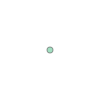

In [13]:
pt

In [14]:
track_points

,NAME,REC_TIME,_LATITUDE,_LONGITUDE,_ELEVATION,_ORTHO_HT,_FIX_ID,_H_ACC,_V_ACC,_SPEED,_BEARING,geometry
0,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491988,5.373602,165.039,0.0,5.0,0.054,0.110,0.037,282.00,POINT Z (5.37360 43.49199 165.03900)
1,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491992,5.373568,164.817,0.0,5.0,0.130,0.180,1.982,278.11,POINT Z (5.37357 43.49199 164.81700)
2,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491977,5.373481,164.816,0.0,5.0,0.130,0.210,3.625,239.05,POINT Z (5.37348 43.49198 164.81600)
3,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491904,5.373417,165.000,0.0,5.0,0.059,0.120,4.401,201.66,POINT Z (5.37342 43.49190 165.00000)
4,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491807,5.373362,164.871,0.0,5.0,0.054,0.079,5.086,204.71,POINT Z (5.37336 43.49181 164.87100)
...,...,...,...,...,...,...,...,...,...,...,...,...
223,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491668,5.373427,165.475,0.0,4.0,0.010,0.010,5.392,46.59,POINT Z (5.37343 43.49167 165.47500)
224,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491713,5.373537,165.547,0.0,4.0,0.010,0.014,3.909,69.18,POINT Z (5.37354 43.49171 165.54700)
225,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491728,5.373660,165.633,0.0,4.0,0.010,0.013,4.557,85.54,POINT Z (5.37366 43.49173 165.63300)
226,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491718,5.373787,165.701,0.0,4.0,0.011,0.020,3.777,101.93,POINT Z (5.37379 43.49172 165.70100)


In [15]:
p1, p2 = nearest_points(track_points.geometry, pt)

In [16]:
p1

0      POINT Z (5.37360 43.49199 165.03900)
1      POINT Z (5.37357 43.49199 164.81700)
2      POINT Z (5.37348 43.49198 164.81600)
3      POINT Z (5.37342 43.49190 165.00000)
4      POINT Z (5.37336 43.49181 164.87100)
                       ...                 
223    POINT Z (5.37343 43.49167 165.47500)
224    POINT Z (5.37354 43.49171 165.54700)
225    POINT Z (5.37366 43.49173 165.63300)
226    POINT Z (5.37379 43.49172 165.70100)
227    POINT Z (5.37385 43.49171 165.86200)
Name: geometry, Length: 228, dtype: geometry

In [36]:
p2

0      POINT (5.37361 43.49199)
1      POINT (5.37361 43.49199)
2      POINT (5.37361 43.49199)
3      POINT (5.37361 43.49199)
4      POINT (5.37361 43.49199)
                 ...           
223    POINT (5.37361 43.49199)
224    POINT (5.37361 43.49199)
225    POINT (5.37361 43.49199)
226    POINT (5.37361 43.49199)
227    POINT (5.37361 43.49199)
Name: geometry, Length: 228, dtype: geometry

## Point le plus proche (avec geopandas)

gdf est le point en dataframe. On va regarder quel est le point de la trace qui est le plus proche avec sjoin_nearest :

In [17]:
gdf = gpd.GeoDataFrame({'geometry': [pt]})

In [18]:
a = gpd.sjoin_nearest(gdf, track_points)

C:\Users\alaeddine.jerad\AppData\Local\Temp\ipykernel_2312\2017220742.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  a = gpd.sjoin_nearest(gdf, track_points)
C:\Users\alaeddine.jerad\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [19]:
a

,geometry,index_right,NAME,REC_TIME,_LATITUDE,_LONGITUDE,_ELEVATION,_ORTHO_HT,_FIX_ID,_H_ACC,_V_ACC,_SPEED,_BEARING
0,POINT (5.37294 43.49159),10,1essai,06/19/2024 15:44:02.800 GMT+02:00,43.491592,5.372933,164.859,0.0,5.0,0.046,0.077,4.544,243.69


In [20]:
print(pt.x, pt.y)

5.372942833333333 43.4915945


In [21]:
index_nearest = a.index_right.values[0]
index_nearest

10

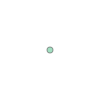

In [23]:
nearest_point = track_points.iloc[index_nearest].geometry
nearest_point

AttributeError: 'Point' object has no attribute 'plot'

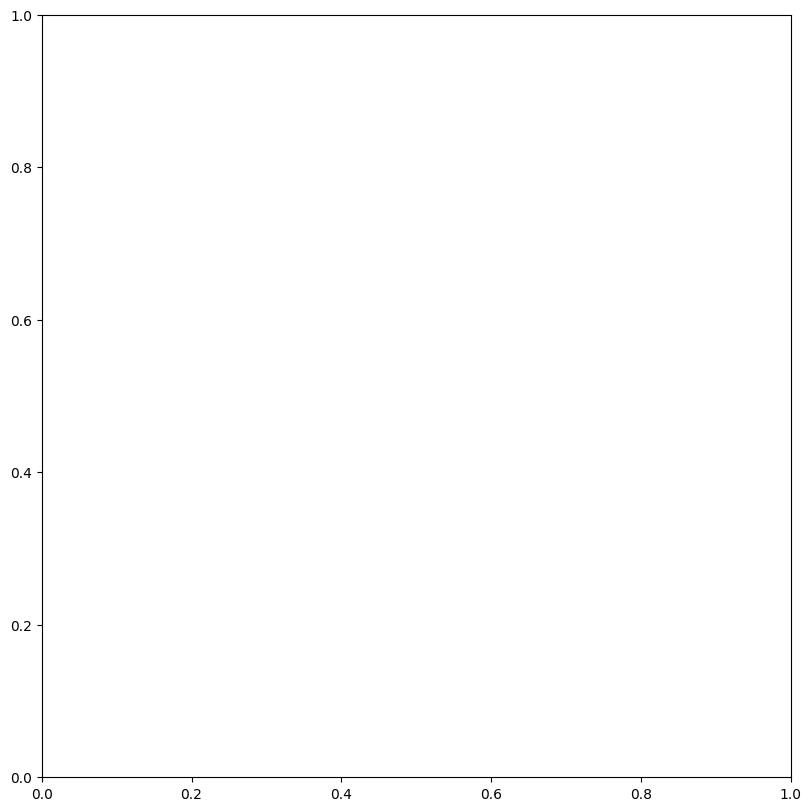

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(8, 8), layout='constrained')
nearest_point.plot(ax=ax, color='red')
gdf.plot(ax=ax, color='blue',marker='o',markersize=10)

plt.show()

## Modif EXIF

On va modifier les paramètres de l'image pour mettre la nouvelle coordonnée :

In [74]:
!pip install piexif


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import piexif

exif_dict = piexif.load(img)

In [76]:
exif_dict

{'0th': {270: b'DCIM\\132GOPRO\\G0141817.JPG\x00\x00\x00\x00\x00',
  271: b'GoPro\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
  272: b'HERO5 Black\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
  274: 1,
  282: (72, 1),
  283: (72, 1),
  296: 2,
  305: b'HD5.02.02.70.00\x00\x00\x00\x00\x00\x00\x00\x00',
  306: b'2024:06:19 15:33:38',
  531: 1,
  34665: 158,
  34853: 686},
 'Exif': {33434: (1019, 1000000),
  33437: (280, 100),
  34850: 2,
  34855: 400,
  36864: b'0221',
  36867: b'2024:06:19 15:33:38',
  36868: b'2024:06:19 15:33:38',
  37121: b'\x01\x02\x03\x00',
  37122: (4294966296, 297),
  37377: (-9937, -1000),
  37378: (297, 100),
  37380: (0, 32),
  37381: (297, 100),
  37382: (0, 100),
  37383: 0,
  37384: 0,
  37385: 32,
  37386: (3, 1),
  37500: b'\n\x00\x12\x06\x00\xc0\x82G\x00\x00LAE6093017605887\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [77]:
exif_dict['GPS']

{1: b'N',
 2: ((43, 1), (29, 1), (311503199, 10000000)),
 3: b'E',
 4: ((5, 1), (22, 1), (250053600, 10000000)),
 5: 0,
 6: (164514, 1000),
 7: ((13, 1), (33, 1), (37, 1)),
 29: b'2024:06:19'}

In [79]:
print(exif_dict['GPS'][piexif.GPSIFD.GPSLongitude], exif_dict['GPS'][piexif.GPSIFD.GPSLatitude])

((5, 1), (22, 1), (250053600, 10000000)) ((43, 1), (29, 1), (311503199, 10000000))


In [82]:
type(nearest_point)

pandas.core.series.Series

In [98]:
print(nearest_point.x, nearest_point.y)
x = nearest_point.x
y = nearest_point.y

5.373602075000001 43.49198805166667


In [100]:
import math

def decimal_to_dms(value : float, precision : int):
    deg = math.floor(value)
    min = math.floor((value - deg) * 60)
    sec = math.floor((value - deg - min / 60) * 3600 * precision)
    return((deg, 1), (min, 1), (sec, precision))

long, lat = (decimal_to_dms(x, 1000000), decimal_to_dms(y, 1000000))
print(long, lat)

((5, 1), (22, 1), (24967470, 1000000)) ((43, 1), (29, 1), (31156985, 1000000))


In [25]:
from PIL import Image

im = Image.open(img)

In [113]:
exif_dict = piexif.load(im.info['exif'])
piexif.dump(exif_dict)

b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0c\x01\x0e\x00\x02\x00\x00\x00 \x00\x00\x00\x9e\x01\x0f\x00\x02\x00\x00\x00\x1e\x00\x00\x00\xbe\x01\x10\x00\x02\x00\x00\x00\x1e\x00\x00\x00\xdc\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xfa\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x01\x02\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x18\x00\x00\x01\n\x012\x00\x02\x00\x00\x00\x14\x00\x00\x01"\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x016\x88%\x00\x04\x00\x00\x00\x01\x00\x00\x0c\xca\x00\x00\r\x95DCIM\\132GOPRO\\G0141817.JPG\x00\x00\x00\x00\x00\x00GoPro\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00HERO5 Black\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01HD5.02.02.70.00\x00\x00\x00\x00\x00\x00\x00\x00\x002024:06:19 15:33:38\x00\x00)\x82\x9a\x

In [114]:
exif_dict['GPS'][piexif.GPSIFD.GPSLongitude] = decimal_to_dms(x, 10000)
exif_dict['GPS'][piexif.GPSIFD.GPSLatitude] =  decimal_to_dms(y, 10000)

In [115]:
exif_bytes = piexif.dump(exif_dict)

## Export de l'image

In [116]:
im.save('../data/maphoto.jpg', 'jpeg', exif = exif_bytes)